In [140]:
import networkx as nx
import matplotlib.pyplot as plot
import matplotlib.colors as colors
%matplotlib inline
plot.rcParams['figure.figsize'] = (21, 14)
import pandas as pd
import scipy.stats as stats

# Create Graph

In the txt file, there are two types of data: Vertices and Edges. Vertices has more than three columns 
which include information of the person. The edge data has three columns and the first two columns are vertices
in the edge and the third column is always 1 indicating they are linked. 
So I need to loop through the file and find out row is vertices and which row is edge using length of the row
In this data set the vertices can be either a person or a movie and I will only include person in my graph
since my category is the person's job. 

To aviod create edges including movie as node, I store all node in two dictinory first. Then when looping through 
an edge, I will looking up the dictinory for node type and I wll only create nodes and edges if no movie nodes involved


In [141]:
G =nx.Graph()
data = "C:/Users/andre/Downloads/newmovies/newmovies.txt"
node_name = {};
node_type= {};
with open(data,encoding='utf-8') as d:
    for line in d:
        line = line.strip()
        line = line.split('\t')
        if len(line) > 3 and line[3].strip() != 'movie':        
                    node_name[line[0].strip()] = line[1].strip()
                    node_type[line[0].strip()] = line[3].strip()
d.close()

i = 1
with open(data,encoding='utf-8') as f:
    for line in f: 
        if i < 1000:
            line = line.strip()
            line = line.split('\t')
            if len(line) == 3 and line[2].strip() == '1' :
                line[0] = line[0].strip()
                line[1] = line[1].strip()
                if line[0] in node_name.keys() and line[1] in node_name.keys():
                    if line[0] not in G.nodes():
                        G.add_node(line[0], {'Name':node_name[line[0]],'Role':node_type[line[0]]} )
                    if line[1] not in G.nodes():
                        G.add_node(line[1], {'Name':node_name[line[1]],'Role':node_type[line[1]]} )   
                    G.add_edge(line[0],line[1])                               
                    i = i +1
f.close()


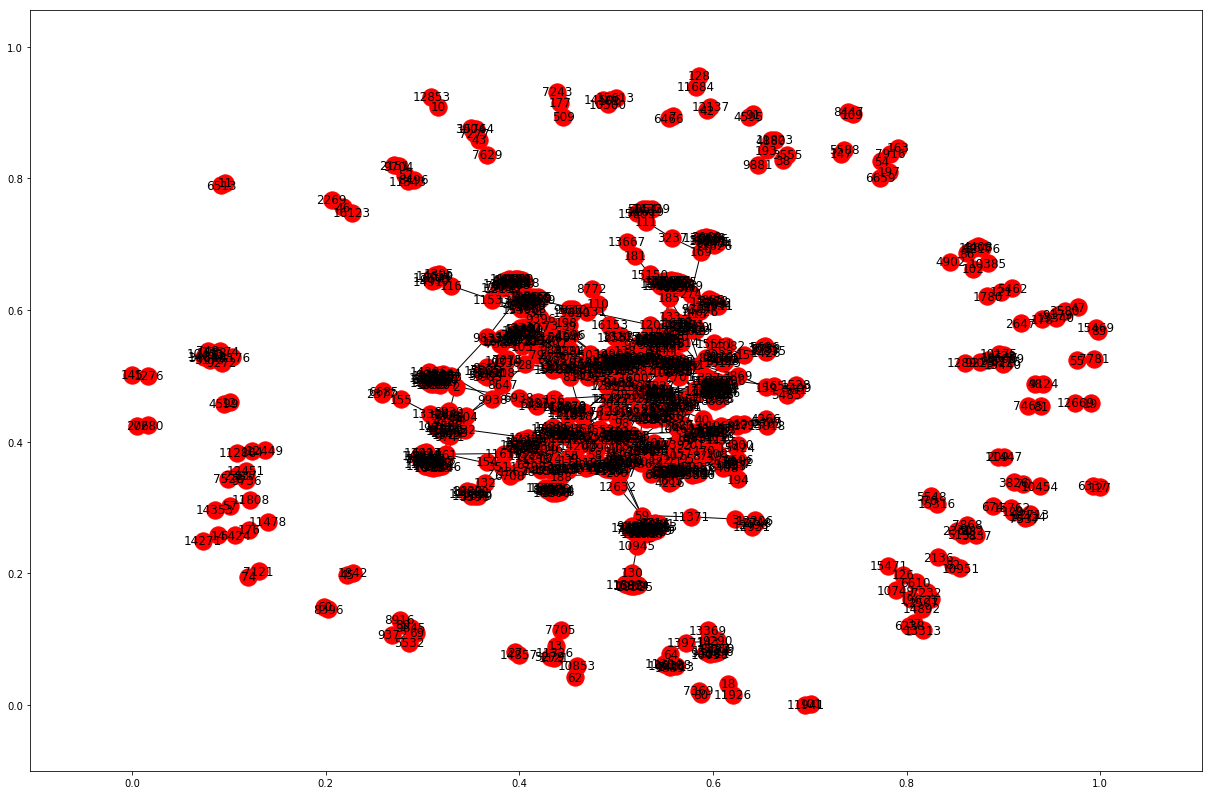

In [142]:
nx.draw_networkx(G)


# Calculate Centrality

In [149]:
bet = nx.betweenness_centrality(G)
deg=nx.degree_centrality(G)
eigen = nx.eigenvector_centrality_numpy(G)

# Create Table for Three Centrality

In this section I create three data frames for three centrlity. I will sort each centrality in descending order 
and create dictionary to assign node category and name using dictionary created before. Then I will convert
the centrlity dictionary into data frame

In [150]:
sort_bet = sorted(zip(bet.values(), bet.keys()), reverse=True)
dic = {'Node': [],'Name' :[], 'Between' : [],'Role' :[] }
for i in range(0,900):
    dic['Node'].append(sort_bet[i][1]) 
    dic['Name'].append(node_name[sort_bet[i][1]]) 
    dic['Between'].append(sort_bet[i][0]) 
    dic['Role'].append(node_type[sort_bet[i][1]])
top_bet= pd.DataFrame(dic)
top_bet=top_bet[['Node', 'Name', 'Between', 'Role']]
top_bet.head()

,Node,Name,Between,Role
0,142,"""Mira Sorvino""",0.149247,starring
1,1980,"""Ang Lee""",0.142001,director
2,112,"""Zoe Akins""",0.123545,writer
3,207,"""John Turturro""",0.119001,starring
4,12386,"""Marilyn Monroe""",0.106171,starring


In [153]:
sort_deg = sorted(zip(deg.values(), deg.keys()), reverse=True)
dic = {'Node': [],'Name' :[], 'Degree' : [],'Role' :[] }
for i in range(0,900):
    dic['Node'].append(sort_deg[i][1]) 
    dic['Name'].append(node_name[sort_deg[i][1]]) 
    dic['Degree'].append(sort_deg[i][0]) 
    dic['Role'].append(node_type[sort_deg[i][1]])
top_deg= pd.DataFrame(dic)
top_deg=top_deg[['Node', 'Name', 'Degree', 'Role']]
top_deg.head()

,Node,Name,Degree,Role
0,59,"""Elizabeth Berkley""",0.036026,starring
1,119,"""Eric Idle""",0.032751,writer
2,161,"""Anne Hathaway (actress)""",0.030568,starring
3,36,"""James Taylor""",0.026201,writer
4,185,"""Sean Bean""",0.026201,starring


For eigen vector centrlity, if will not work if a node has two eigen vector with same length, so I use
eigenvector_centrality_numpy fnction and only postive output in this function are guaranteed to comply with
eigenvector theory, so I will only include postive value in the eigenvector data frame

In [152]:
filtered_eigen = {k:v for k,v in eigen.items() if v > 0}
sort_eigen = sorted(zip(filtered_eigen.values(), filtered_eigen.keys()), reverse=True)
dic = {'Node': [],'Name' :[], 'Eigen' : [],'Role' :[] }
for i in range(0,len(sort_eigen)):
    dic['Node'].append(sort_eigen[i][1]) 
    dic['Name'].append(node_name[sort_eigen[i][1]]) 
    dic['Eigen'].append(sort_eigen[i][0]) 
    dic['Role'].append(node_type[sort_eigen[i][1]])
top_eigen= pd.DataFrame(dic)
top_eigen=top_eigen[['Node', 'Name', 'Eigen', 'Role']]
top_eigen.head()


,Node,Name,Eigen,Role
0,59,"""Elizabeth Berkley""",0.548344,starring
1,119,"""Eric Idle""",0.363993,writer
2,36,"""James Taylor""",0.200903,writer
3,2007,"""Leonardo DiCaprio""",0.138968,starring
4,15007,"""Bette Midler""",0.105767,starring


# Hypothesis Testing

H0: Ms = Mw = Md
H1: At least one mean is different than other two
Obtain the p-value based on the F-test score
if P < 0.05 reject H0

# Hypothesis Testing Degree Centrality

In [108]:
starring = list(top_deg[(top_deg["Role"]=="starring")]["Degree"])
director = list(top_deg[(top_deg["Role"]=="director")]["Degree"])
writer = list(top_deg[(top_deg["Role"]=="writer")]["Degree"])
stats.f_oneway(starring,director,writer)

F_onewayResult(statistic=0.55102030055432472, pvalue=0.57655641289701776)

# Hypothesis Testing Betweeness Centrality

In [110]:
starring = list(top_bet[(top_bet["Role"]=="starring")]["Between"])
director = list(top_bet[(top_bet["Role"]=="director")]["Between"])
writer = list(top_bet[(top_bet["Role"]=="writer")]["Between"])
stats.f_oneway(starring,director,writer)

F_onewayResult(statistic=0.26129741397622236, pvalue=0.77011045435508241)

# Hypothesis Testing Eigenvector Centrality

In [134]:
starring = list(top_eigen[(top_eigen["Role"]=="starring")]["Eigen"])
director = list(top_eigen[(top_eigen["Role"]=="director")]["Eigen"])
writer = list(top_eigen[(top_eigen["Role"]=="writer")]["Eigen"])
stats.f_oneway(starring,director,writer)

F_onewayResult(statistic=1.8392188722325986, pvalue=0.15959739992964705)

Since all three test have P value > 0.05 we can not reject Null hypothsis. So we can not conclude that what people do will affact centrality. Thus influence of people with different role should perform in smiliar way on Wiki 